In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 1. Load the dataset (ensure 'google_5yr_one.csv' is in the same directory)
df = pd.read_csv('google_5yr_one.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)

# 2. Immediately convert the price & volume columns to numeric types
#    If any value can’t be parsed, it becomes NaN.
cols_to_numeric = ['Open', 'High', 'Low', 'Close', 'Volume']
df[cols_to_numeric] = df[cols_to_numeric].apply(lambda col: pd.to_numeric(col, errors='coerce'))

# 3. Verify the dtypes
df.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume           float64
dtype: object

In [9]:
# Summary statistics for numerical columns
df.describe()

,Date,Close,High,Low,Open,Volume
count,1255,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,2022-11-30 12:32:42.071713280,127.343522,128.767640,125.894397,127.286213,3.211913e+07
min,2020-06-04 00:00:00,67.802834,69.567407,67.260929,67.693363,9.312000e+06
25%,2021-08-31 12:00:00,102.415359,103.588002,101.102139,102.211330,2.333280e+07
50%,2022-11-29 00:00:00,128.465805,130.137811,126.953037,128.635000,2.882800e+07
75%,2024-02-29 12:00:00,147.319427,148.956410,146.023874,147.533393,3.675800e+07
max,2025-06-02 00:00:00,206.142593,206.811821,202.576693,203.156027,1.274901e+08
std,NaN,31.589957,31.873115,31.332366,31.626389,1.354981e+07


In [10]:
# Check for missing values
df.isna().sum()

Date      1
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

In [11]:
# 7. Calculate daily returns (%) based on the 'Close' price
df['Return'] = df['Close'].pct_change() * 100

# Display summary statistics of daily returns
df['Return'].describe()

/var/folders/h4/vsh7n_wx1fv3kqncq36zdqm80000gn/T/ipykernel_51061/77950888.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Close'].pct_change() * 100


count    1255.000000
mean        0.089067
std         1.961321
min        -9.509391
25%        -0.959004
50%         0.141874
75%         1.154637
max        10.224365
Name: Return, dtype: float64

In [12]:
# 8. Calculate 50-day and 200-day moving averages on 'Close'
df['MA50']  = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Show the first few rows (including the new columns)
df[['Date', 'Close', 'Return', 'MA50', 'MA200']].head(10)

,Date,Close,Return,MA50,MA200
1,2020-06-04,70.378517,NaN,NaN,NaN
2,2020-06-05,71.658401,1.818572,NaN,NaN
3,2020-06-08,72.057487,0.556928,NaN,NaN
4,2020-06-09,72.258530,0.279002,NaN,NaN
5,2020-06-10,72.886528,0.869099,NaN,NaN
6,2020-06-11,69.761475,-4.287560,NaN,NaN
7,2020-06-12,70.309853,0.786076,NaN,NaN
8,2020-06-15,70.698990,0.553461,NaN,NaN
9,2020-06-16,71.979370,1.811030,NaN,NaN
10,2020-06-17,72.281425,0.419642,NaN,NaN


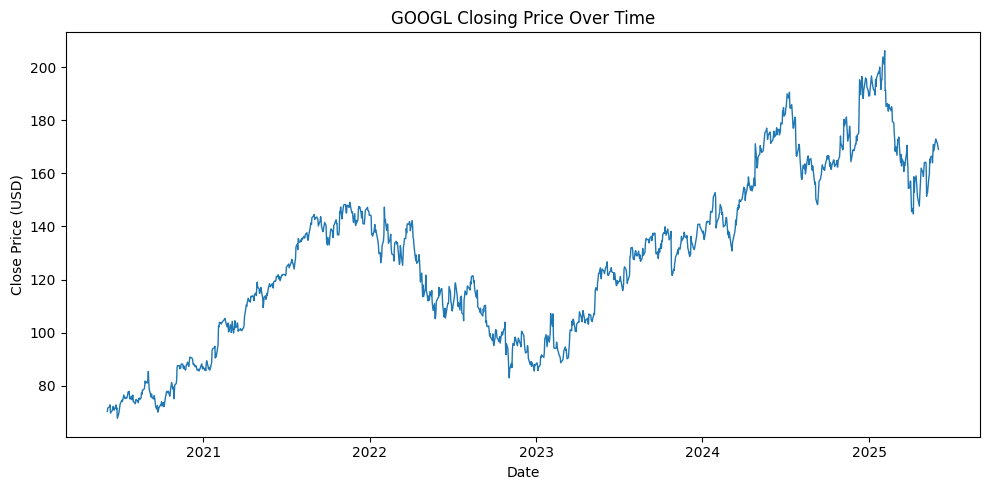

In [13]:
# 9. Plot 1: 'Close' Price over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], lw=1)
plt.title('GOOGL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.tight_layout()
plt.show()

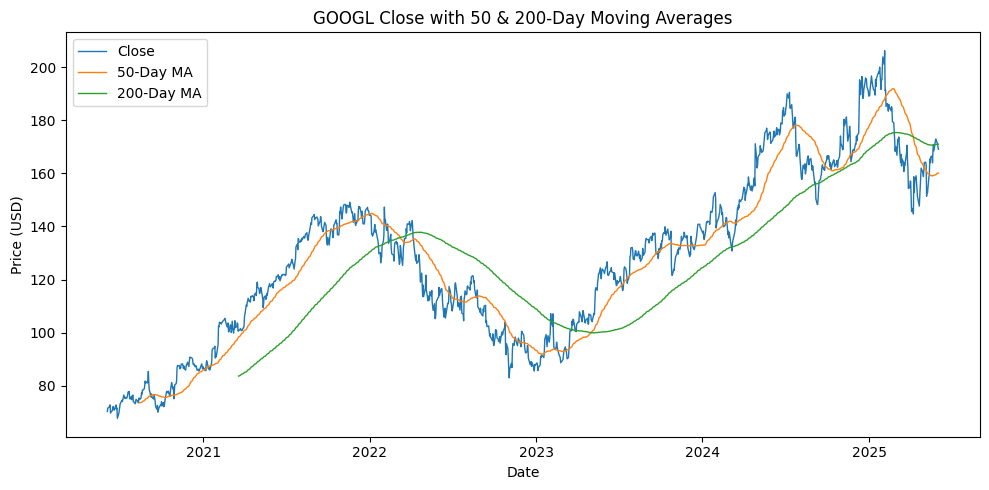

In [14]:
# 10. Plot 2: 'Close' + Moving Averages (50-day & 200-day)
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'],  label='Close',   lw=1)
plt.plot(df['Date'], df['MA50'],   label='50-Day MA',  lw=1)
plt.plot(df['Date'], df['MA200'],  label='200-Day MA', lw=1)
plt.title('GOOGL Close with 50 & 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

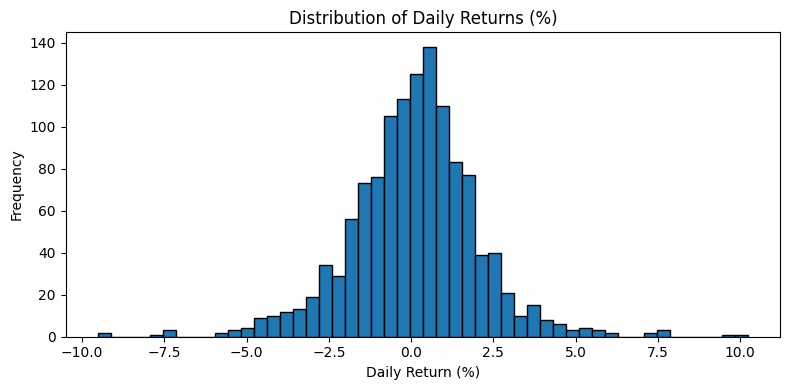

In [15]:
# 11. Plot 3: Histogram of Daily Returns (%)
plt.figure(figsize=(8, 4))
plt.hist(df['Return'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Daily Returns (%)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

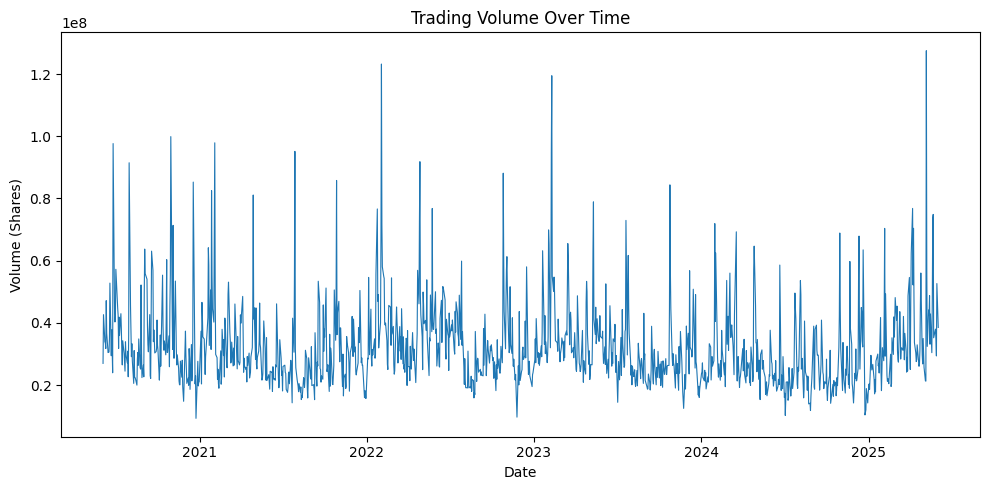

In [16]:
# 12. Plot 4: Trading Volume Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volume'], lw=0.8)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.tight_layout()
plt.show()